In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from ph_likes.util import queries

/home/can/anaconda3/lib/python3.6/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


# Get Tables

In [2]:
queries.get_table_names()

[('django_admin_log',),
 ('producthunt_post',),
 ('django_session',),
 ('django_migrations',),
 ('django_content_type',),
 ('auth_group_permissions',),
 ('auth_user',),
 ('auth_group',),
 ('auth_user_groups',),
 ('auth_permission',),
 ('auth_user_user_permissions',),
 ('producthunt_postlike',),
 ('producthunt_phuser',),
 ('producthunt_topic',),
 ('producthunt_posttopic',)]

In [3]:
# df_user = queries.get_phuser_table()
# df_post = queries.get_post_table()
# df_postlike = queries.get_postlike_table()
df_topic = queries.get_topic_table()
df_posttopic = queries.get_posttopic_table()

In [7]:
df_posttopic

,id,post_id,topic_id
0,1,1,1
1,2,1,8
2,3,1,45
3,4,1,11
4,5,2,2
5,6,2,27
6,7,3,3
7,8,3,53
8,9,3,86
9,10,3,11


# Exploration

In [4]:
print('len(df_user):', len(df_user))
print('len(df_post):', len(df_post))
print('len(df_postlike):', len(df_postlike))

len(df_user): 774630
len(df_post): 63774
len(df_postlike): 10671790


## User

In [5]:
df_user

,id,ph_id,ph_enc_id,ph_response,name,username,created,last_visited,headline,twitter_username,last_crawled
0,2,1405195,VXNlci0xNDA1MTk1,"{""name"": ""Law Smith"", ""headline"": ""Digital B2B...",Law Smith,lawsmith34,2019-01-27 19:12:35.020270+00:00,None,Digital B2B SMB CEO | Stand Up Comedian,LawSmith34,NaT
1,3,80545,VXNlci04MDU0NQ==,"{""name"": ""Andrey Kotlyar"", ""headline"": ""Produc...",Andrey Kotlyar,kotlyar,2019-01-27 19:12:35.030423+00:00,None,Product manager at Form.one,kotlyar,NaT
2,4,704038,VXNlci03MDQwMzg=,"{""name"": ""Zalmay Karimi"", ""headline"": ""Founder...",Zalmay Karimi,zalmay_karimi,2019-01-27 19:12:35.040380+00:00,None,Founder of Chatlanding.com,None,NaT
3,5,1630090,VXNlci0xNjMwMDkw,"{""name"": ""RatingDapp"", ""headline"": ""Dapp perfo...",RatingDapp,ratingdapp,2019-01-27 19:12:35.050235+00:00,None,Dapp performance tracking evolved.,None,NaT
4,6,199064,VXNlci0xOTkwNjQ=,"{""name"": ""KC"", ""headline"": ""Bayes Area"", ""twit...",KC,kingkcbarrett,2019-01-27 19:12:35.060175+00:00,None,Bayes Area,KingKCBarrett,NaT
5,7,563351,VXNlci01NjMzNTE=,"{""name"": ""Nate Davis"", ""headline"": ""UI Designe...",Nate Davis,_nathanieldavis,2019-01-27 19:12:35.070357+00:00,None,UI Designer,_nathanieldavis,NaT
6,8,1484041,VXNlci0xNDg0MDQx,"{""name"": ""Desmond Yuen"", ""headline"": ""Growth H...",Desmond Yuen,desmondyuen,2019-01-27 19:12:35.080303+00:00,None,"Growth Hacker, Startup Adviser, Writer",desmondyuen1,NaT
7,9,100251,VXNlci0xMDAyNTE=,"{""name"": ""Stefan Wirth"", ""headline"": ""CTO by d...",Stefan Wirth,nafetswirth,2019-01-27 19:12:35.090062+00:00,None,"CTO by day, maker by night.",NafetsWirth,NaT
8,10,510474,VXNlci01MTA0NzQ=,"{""name"": ""Harsha HM"", ""headline"": null, ""twitt...",Harsha HM,harsha_hm,2019-01-27 19:12:35.099529+00:00,None,None,None,NaT
9,11,967568,VXNlci05Njc1Njg=,"{""name"": ""Fraser"", ""headline"": ""Working on des...",Fraser,frasergreenlee1,2019-01-27 19:12:35.108933+00:00,None,Working on desc2code!,FraserGreenlee,NaT


## Post

In [6]:
df_post

,id,created,ph_id,ph_enc_id,ph_response,featured_at,created_at,last_crawled,total_votes,name,tagline,image_uuid,thumbnail,shortened_url,slug,comments_count
0,467,2019-01-27 18:44:36.676004+00:00,142385,UG9zdC0xNDIzODU=,"{""trashed_at"": null, ""__typename"": ""Post"", ""sl...",2019-01-07 09:18:15+00:00,None,2019-01-27 19:39:30.392039+00:00,80,Wynd Halo + Home Purifier,The smartest air quality platform for a health...,9db9c68d-e934-4a79-897d-482d02e81137,None,/r/p/142385,wynd-halo-home-purifier,16
1,8662,2019-01-27 19:02:48.735322+00:00,118856,UG9zdC0xMTg4NTY=,"{""product_state"": ""default"", ""comments_count"":...",2018-01-29 08:35:57+00:00,None,2019-01-28 04:15:25.890612+00:00,929,Prototypr.io,"Daily design news, inspiration and deals",dbbb93ec-eb38-4ff3-b41a-bedce7ea6246,None,/r/p/118856,prototypr-io-2,49
2,469,2019-01-27 18:44:36.692509+00:00,142380,UG9zdC0xNDIzODA=,"{""trashed_at"": null, ""__typename"": ""Post"", ""sl...",2019-01-07 08:40:57+00:00,None,2019-01-27 19:39:32.098237+00:00,55,ASUS ZenBook S13,New laptop from Asus with the World's thinnest...,d8465a05-c9b6-4bb8-8a72-24c12a8bbb61,None,/r/p/142380,asus-zenbook-s13,1
3,49347,2019-01-27 20:02:12.613879+00:00,20086,UG9zdC0yMDA4Ng==,"{""product_state"": ""default"", ""comments_count"":...",2015-05-05 09:06:03+00:00,None,2019-01-29 18:27:28.989379+00:00,100,6degrees,Get introductions through your friends' phones,eb2c1088-51f5-4de4-b963-f671fe87bcc1,None,/r/p/20086,6degrees,7
4,49353,2019-01-27 20:02:12.664743+00:00,20045,UG9zdC0yMDA0NQ==,"{""product_state"": ""default"", ""comments_count"":...",2015-05-05 10:00:00+00:00,None,2019-01-29 18:27:46.704430+00:00,96,Postpone Pixel,Send a photo to yourself or a friend in the fu...,a8f1f46c-7666-4e61-a8df-d12822cbff07,None,/r/p/20045,postpone-pixel,2
5,49354,2019-01-27 20:02:12.672797+00:00,20100,UG9zdC0yMDEwMA==,"{""product_state"": ""default"", ""comments_count"":...",2015-05-05 11:55:18+00:00,None,2019-01-29 18:27:48.840524+00:00,66,Empathy Cards,Support cards for people with serious illnesses,111ae82d-4936-4475-a725-3015c3999bbd,None,/r/p/20100,empathy-cards,3
6,473,2019-01-27 18:44:36.726909+00:00,142351,UG9zdC0xNDIzNTE=,"{""trashed_at"": null, ""__typename"": ""Post"", ""sl...",2019-01-07 08:00:00+00:00,None,2019-01-27 19:39:34.930997+00:00,42,Texano,Web app to anonymize textual data with machine...,1b406e97-f491-4a53-bca6-13bb618c361f,None,/r/p/142351,texano,5
7,49361,2019-01-27 20:02:12.730591+00:00,20150,UG9zdC0yMDE1MA==,"{""product_state"": ""default"", ""comments_count"":...",2015-05-05 17:16:03+00:00,None,2019-01-29 18:28:02.875850+00:00,50,Hedgy,Settles Financial Smart Contracts 30X Faster,ef92264b-becb-4bca-b63a-de888c0965cd,None,/r/p/20150,hedgy,6
8,49368,2019-01-27 20:02:12.791939+00:00,20160,UG9zdC0yMDE2MA==,"{""product_state"": ""default"", ""comments_count"":...",2015-05-05 19:02:09+00:00,None,2019-01-29 18:28:14.525104+00:00,25,Fleetzen,Request a large vehicle to help you move your ...,9eab24bf-11c4-4c67-8f59-fe3aafcc1ff5,None,/r/p/20160,fleetzen,1
9,3407,2019-01-27 18:47:54.084165+00:00,134033,UG9zdC0xMzQwMzM=,"{""trashed_at"": null, ""__typename"": ""Post"", ""sl...",2018-09-02 07:00:00+00:00,None,2019-01-27 22:57:13.743929+00:00,137,The All Natural T-Shirt,Organic cotton. Natural dyes. Nothing else.,ef5e1578-079b-4bdc-8b81-820a98627c8a,None,/r/p/134033,the-all-natural-t-shirt,11


/home/can/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


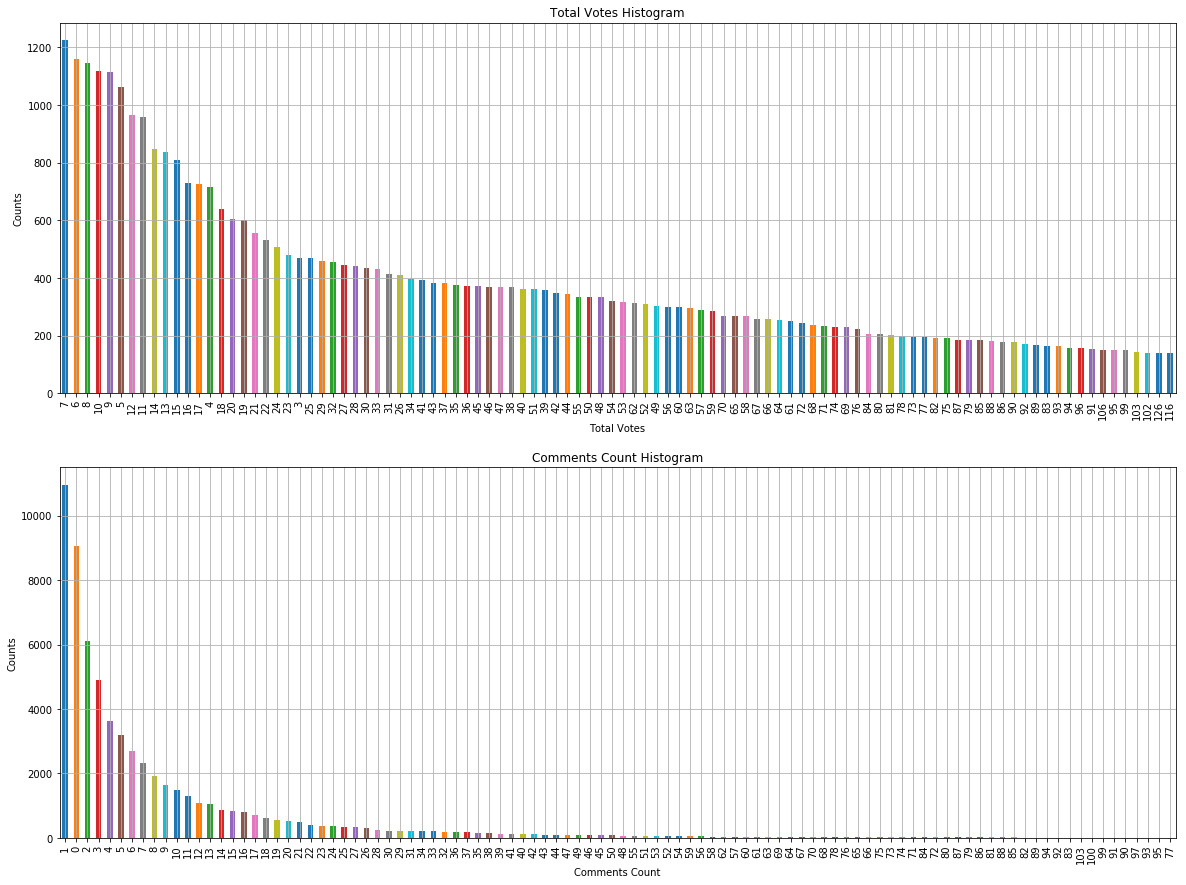

In [7]:
# Plot total votes and comments histogram
fig = plt.figure(figsize=(20, 15))
plt.subplot(2, 1, 1); df_post['total_votes'].value_counts().iloc[:100].plot(kind='bar')
plt.xlabel('Total Votes'); plt.ylabel('Counts'); plt.title('Total Votes Histogram'); plt.grid('on')
plt.subplot(2, 1, 2); df_post['comments_count'].value_counts().iloc[:100].plot(kind='bar')
plt.xlabel('Comments Count'); plt.ylabel('Counts'); plt.title('Comments Count Histogram'); plt.grid('on')

/home/can/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


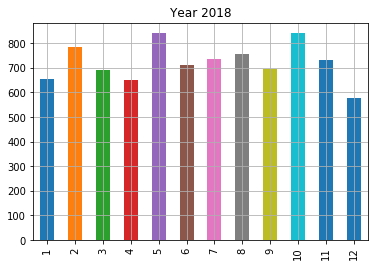

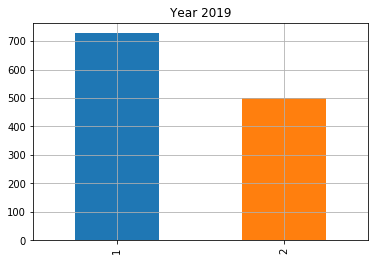

In [8]:
# Plot Dates
fig = plt.figure()
df_post['featured_at'][df_post['featured_at'].dt.year.isin([2018])].dt.month.value_counts().sort_index().plot(kind='bar')
plt.title('Year 2018'); plt.grid('on')

fig = plt.figure()
df_post['featured_at'][df_post['featured_at'].dt.year.isin([2019])].dt.month.value_counts().sort_index().plot(kind='bar')
plt.title('Year 2019'); plt.grid('on')

## Post Like

In [9]:
df_postlike

,id,post_id,user_id
0,1,1,1
1,2,1,2
2,3,1,3
3,4,1,4
4,5,1,5
5,6,1,6
6,7,1,7
7,8,1,8
8,9,1,9
9,10,1,10
